In [4]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt

In [5]:
METRICS_PATH = Path('/home/lucas.rotsen/Git_Repos/benchmark_frameworks/metrics/raw')

In [50]:
repos_df = pd.read_csv(next(METRICS_PATH.glob('repos.csv')), sep=',')
repos_metrics_df = pd.read_csv(next(METRICS_PATH.glob('repos-metrics.csv')), sep=',', index_col='Unnamed: 0')
issues_metrics_df = pd.read_csv(next(METRICS_PATH.glob('issues-metrics.csv')), sep=',')

In [51]:
repos_df

,owner,name,created_at,merged_pull_requests,total_releases,total_closed_issues
0,playframework,playframework,2011-09-07T09:24:08Z,5516,41,2993
1,django,django,2012-04-28T02:47:18Z,5468,0,0
2,ktorio,ktor,2015-08-03T16:49:36Z,300,27,804
3,rails,rails,2008-04-11T02:19:47Z,16733,18,13286
4,spring-projects,spring-framework,2010-12-08T04:04:45Z,542,175,18555
5,laravel,laravel,2011-06-08T03:06:08Z,1227,36,0
6,expressjs,express,2009-06-26T18:56:01Z,200,141,3177
7,gin-gonic,gin,2014-06-16T23:57:25Z,614,12,1155
8,vapor,vapor,2016-01-18T22:37:52Z,860,309,1205
9,dotnet,core,2014-11-18T00:44:57Z,980,97,2944


In [72]:
df = pd.DataFrame({'merged_pull_requests': [repos_df['merged_pull_requests'].mean(), repos_df['merged_pull_requests'].std(), repos_df['merged_pull_requests'].max(), repos_df['merged_pull_requests'].min(), repos_df['merged_pull_requests'].median()],
                   'total_releases': [repos_df['total_releases'].mean(), repos_df['total_releases'].std(), repos_df['total_releases'].max(), repos_df['total_releases'].min(), repos_df['total_releases'].median()],
                   'total_closed_issues': [repos_df['total_closed_issues'].mean(), repos_df['total_closed_issues'].std(), repos_df['total_closed_issues'].max(), repos_df['total_closed_issues'].min(), repos_df['total_closed_issues'].median()]},
                  index=['mean', 'std', 'max', 'min', 'median'])

df

,merged_pull_requests,total_releases,total_closed_issues
mean,3244.000000,85.60000,4411.900000
std,5154.173045,97.92083,6300.865769
max,16733.000000,309.00000,18555.000000
min,200.000000,0.00000,0.000000
median,920.000000,38.50000,2074.500000


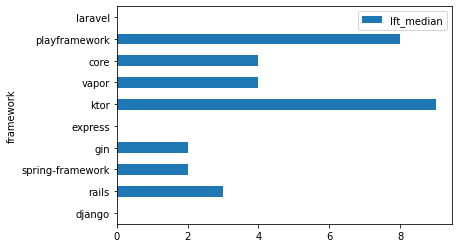

In [90]:
# Lifetime median
issues_metrics_df.plot(kind='barh', x='framework', y='lft_median')

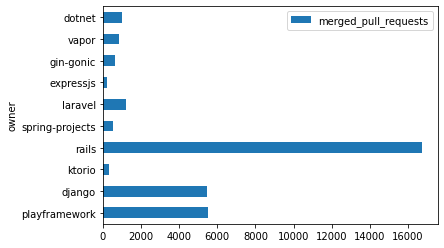

In [92]:
# Median of merged pull requests
repos_df.plot(kind='barh', x='owner', y='merged_pull_requests')

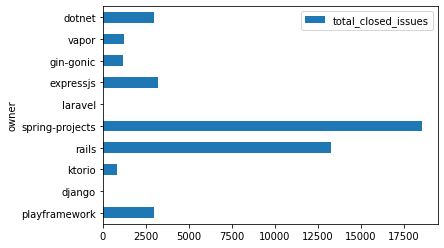

In [93]:
# median of total_closed_issues
repos_df.plot(kind='barh', x='owner', y='total_closed_issues')